In [1]:
import pandas as pd
import sqlite3

data_path = "C:/Users/91628/Downloads/CovidDeaths.csv/CovidDeaths.csv"  

df = pd.read_csv(data_path)

conn = sqlite3.connect(':memory:')
df.to_sql('Covid19', conn, index=False, if_exists='replace')

85171

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

1. List all tables

In [2]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print(tables)

      name
0  Covid19


2. View Full COVID Deaths Table

In [3]:
query1 = "SELECT * FROM Covid19 ORDER BY location, date"
deaths = pd.read_sql_query(query1, conn)
display(deaths)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,1/1/2021,51526.0,0.0,102.286,2191.0,0.0,7.429,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,1/10/2021,53489.0,89.0,280.429,2277.0,13.0,12.286,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,1/11/2021,53538.0,49.0,75.286,2288.0,11.0,7.286,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,1/12/2021,53584.0,46.0,68.429,2301.0,13.0,8.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,1/13/2021,53584.0,0.0,68.429,2301.0,0.0,8.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,ZWE,Africa,Zimbabwe,9/5/2020,6837.0,0.0,61.571,206.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85167,ZWE,Africa,Zimbabwe,9/6/2020,6837.0,0.0,60.714,206.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85168,ZWE,Africa,Zimbabwe,9/7/2020,7298.0,461.0,114.429,210.0,4.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85169,ZWE,Africa,Zimbabwe,9/8/2020,7388.0,90.0,118.429,218.0,8.0,2.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


3. Focused Columns Only

In [4]:
query3 = """
SELECT location, date, total_cases, new_cases, total_deaths, population
FROM Covid19
ORDER BY location, date
"""
focus_col_deaths = pd.read_sql_query(query3, conn)
display(focus_col_deaths)

,location,date,total_cases,new_cases,total_deaths,population
0,Afghanistan,1/1/2021,51526.0,0.0,2191.0,38928341.0
1,Afghanistan,1/10/2021,53489.0,89.0,2277.0,38928341.0
2,Afghanistan,1/11/2021,53538.0,49.0,2288.0,38928341.0
3,Afghanistan,1/12/2021,53584.0,46.0,2301.0,38928341.0
4,Afghanistan,1/13/2021,53584.0,0.0,2301.0,38928341.0
...,...,...,...,...,...,...
85166,Zimbabwe,9/5/2020,6837.0,0.0,206.0,14862927.0
85167,Zimbabwe,9/6/2020,6837.0,0.0,206.0,14862927.0
85168,Zimbabwe,9/7/2020,7298.0,461.0,210.0,14862927.0
85169,Zimbabwe,9/8/2020,7388.0,90.0,218.0,14862927.0


4. Total Cases vs. Deaths Rate

In [5]:
query4 = """
SELECT location, date, total_cases, total_deaths, 
       (total_deaths * 1.0 / total_cases * 100) AS death_rate
FROM Covid19
ORDER BY location, date
"""
death_case_percent = pd.read_sql_query(query4, conn)
display(death_case_percent)

,location,date,total_cases,total_deaths,death_rate
0,Afghanistan,1/1/2021,51526.0,2191.0,4.252222
1,Afghanistan,1/10/2021,53489.0,2277.0,4.256950
2,Afghanistan,1/11/2021,53538.0,2288.0,4.273600
3,Afghanistan,1/12/2021,53584.0,2301.0,4.294192
4,Afghanistan,1/13/2021,53584.0,2301.0,4.294192
...,...,...,...,...,...
85166,Zimbabwe,9/5/2020,6837.0,206.0,3.013017
85167,Zimbabwe,9/6/2020,6837.0,206.0,3.013017
85168,Zimbabwe,9/7/2020,7298.0,210.0,2.877501
85169,Zimbabwe,9/8/2020,7388.0,218.0,2.950731


5. Likelihood of Dying in India

In [6]:
query5 = """
SELECT location, date, total_cases, total_deaths, 
       (total_deaths * 1.0 / total_cases * 100) AS death_rate
FROM Covid19
WHERE location LIKE 'India'
ORDER BY location, date
"""
dying_india = pd.read_sql_query(query5, conn)
display(dying_india)

,location,date,total_cases,total_deaths,death_rate
0,India,1/1/2021,10286709.0,148994.0,1.448413
1,India,1/10/2021,10466595.0,151160.0,1.444214
2,India,1/11/2021,10479179.0,151327.0,1.444073
3,India,1/12/2021,10495147.0,151529.0,1.443801
4,India,1/13/2021,10512093.0,151727.0,1.443357
...,...,...,...,...,...
452,India,9/5/2020,4113811.0,70626.0,1.716802
453,India,9/6/2020,4204613.0,71642.0,1.703890
454,India,9/7/2020,4280422.0,72775.0,1.700183
455,India,9/8/2020,4370128.0,73890.0,1.690797


6. Total Cases vs. Population in India

In [7]:
query6 = """
SELECT location, date, total_cases, population, 
       (total_cases * 1.0 / population * 100) AS infection_rate
FROM Covid19
WHERE location LIKE 'India'
ORDER BY location, date
"""
case_population_per = pd.read_sql_query(query6, conn)
display(case_population_per)

,location,date,total_cases,population,infection_rate
0,India,1/1/2021,10286709.0,1.380004e+09,0.745411
1,India,1/10/2021,10466595.0,1.380004e+09,0.758447
2,India,1/11/2021,10479179.0,1.380004e+09,0.759358
3,India,1/12/2021,10495147.0,1.380004e+09,0.760515
4,India,1/13/2021,10512093.0,1.380004e+09,0.761743
...,...,...,...,...,...
452,India,9/5/2020,4113811.0,1.380004e+09,0.298101
453,India,9/6/2020,4204613.0,1.380004e+09,0.304681
454,India,9/7/2020,4280422.0,1.380004e+09,0.310175
455,India,9/8/2020,4370128.0,1.380004e+09,0.316675


7. Highest Infection Rate Country-Wise

In [8]:
query7 = """
SELECT location, population, MAX(total_cases) AS highest_infection,
       MAX(total_cases * 1.0 / population * 100) AS highest_infection_percentage
FROM Covid19
GROUP BY location, population
ORDER BY highest_infection_percentage DESC
"""
highest_infection = pd.read_sql_query(query7, conn)
display(highest_infection)

,location,population,highest_infection,highest_infection_percentage
0,Andorra,77265.0,13232.0,17.125477
1,Montenegro,628062.0,97389.0,15.506272
2,Czechia,10708982.0,1630758.0,15.227946
3,San Marino,33938.0,5066.0,14.927220
4,Slovenia,2078932.0,240292.0,11.558435
...,...,...,...,...
214,Nauru,10834.0,NaN,NaN
215,Northern Cyprus,NaN,NaN,NaN
216,Saint Helena,6071.0,NaN,NaN
217,Tonga,105697.0,NaN,NaN


8. Highest Death Rate Country-Wise

In [9]:
query8 = """
SELECT location, population, MAX(total_deaths) AS highest_death,
       MAX(total_deaths * 1.0 / population * 100) AS highest_death_percentage
FROM Covid19
GROUP BY location, population
ORDER BY highest_death_percentage DESC
"""
highest_death = pd.read_sql_query(query8, conn)
display(highest_death)

,location,population,highest_death,highest_death_percentage
0,Hungary,9660350.0,27540.0,0.285083
1,Czechia,10708982.0,29267.0,0.273294
2,San Marino,33938.0,90.0,0.265189
3,Bosnia and Herzegovina,3280815.0,8551.0,0.260636
4,Montenegro,628062.0,1495.0,0.238034
...,...,...,...,...
214,Samoa,198410.0,NaN,NaN
215,Solomon Islands,686878.0,NaN,NaN
216,Tonga,105697.0,NaN,NaN
217,Turks and Caicos Islands,38718.0,NaN,NaN


9.1 Highest infection rate country-wise

In [10]:
##Highest infection rate country-wise
query9 = """SELECT location,  population, MAX (total_cases) AS highest_infection, MAX(total_cases/population*100) AS highest_infection_percentage
FROM Covid19
GROUP BY location, population
ORDER BY highest_infection_percentage desc
"""
highest_infection = pd.read_sql_query(query9, conn)
display(highest_infection)

,location,population,highest_infection,highest_infection_percentage
0,Andorra,77265.0,13232.0,17.125477
1,Montenegro,628062.0,97389.0,15.506272
2,Czechia,10708982.0,1630758.0,15.227946
3,San Marino,33938.0,5066.0,14.927220
4,Slovenia,2078932.0,240292.0,11.558435
...,...,...,...,...
214,Nauru,10834.0,NaN,NaN
215,Northern Cyprus,NaN,NaN,NaN
216,Saint Helena,6071.0,NaN,NaN
217,Tonga,105697.0,NaN,NaN


9.2 Highest infection rate country-wise by total deaths

In [11]:
query9_2 = """SELECT location,  population, MAX (total_deaths) AS highest_death, MAX(total_deaths/population*100) AS highest_death_percentage
FROM Covid19
GROUP BY location, population
ORDER BY highest_death_percentage DESC
"""
highest_infection_by_total_deaths = pd.read_sql_query(query9_2, conn)
display(highest_infection_by_total_deaths)

,location,population,highest_death,highest_death_percentage
0,Hungary,9660350.0,27540.0,0.285083
1,Czechia,10708982.0,29267.0,0.273294
2,San Marino,33938.0,90.0,0.265189
3,Bosnia and Herzegovina,3280815.0,8551.0,0.260636
4,Montenegro,628062.0,1495.0,0.238034
...,...,...,...,...
214,Samoa,198410.0,NaN,NaN
215,Solomon Islands,686878.0,NaN,NaN
216,Tonga,105697.0,NaN,NaN
217,Turks and Caicos Islands,38718.0,NaN,NaN


10. Total Death Count

In [12]:
query10 = """
SELECT location, MAX(total_deaths) AS total_death_count
FROM Covid19
ORDER BY total_death_count DESC
"""
max_death = pd.read_sql_query(query10, conn)
display(max_death)

,location,total_death_count
0,World,3180238.0


In [13]:
query10_1 = """SELECT location, MAX(CAST (total_deaths as int64)) AS total_death_count
FROM Covid19
GROUP BY location
ORDER BY total_death_count DESC
"""
total_deaths_by_country = pd.read_sql_query(query10_1, conn)
display(total_deaths_by_country)


,location,total_death_count
0,World,3180238.0
1,Europe,1016750.0
2,North America,847942.0
3,European Union,688896.0
4,South America,672415.0
...,...,...
214,Curacao,NaN
215,Cayman Islands,NaN
216,Bermuda,NaN
217,Aruba,NaN


11. Solving the Continent Issue (Where Continent is NULL)

In [14]:
query11 = """
SELECT location, continent, total_deaths
FROM Covid19
WHERE continent IS NULL
ORDER BY location
"""
cont_issue = pd.read_sql_query(query11, conn)
display(cont_issue)

,location,continent,total_deaths
0,Africa,None,NaN
1,Africa,None,NaN
2,Africa,None,NaN
3,Africa,None,NaN
4,Africa,None,NaN
...,...,...,...
4106,World,None,3120469.0
4107,World,None,3134956.0
4108,World,None,3150675.0
4109,World,None,3165665.0


12. Solving the Continent Issue (Where Continent is NOT NULL)

In [15]:
query12 = """
SELECT location, continent, total_deaths
FROM Covid19
WHERE continent IS NOT NULL
ORDER BY location
"""
cont_issue2 = pd.read_sql_query(query12, conn)
display(cont_issue2)

,location,continent,total_deaths
0,Afghanistan,Asia,NaN
1,Afghanistan,Asia,NaN
2,Afghanistan,Asia,NaN
3,Afghanistan,Asia,NaN
4,Afghanistan,Asia,NaN
...,...,...,...
81055,Zimbabwe,Africa,1560.0
81056,Zimbabwe,Africa,1565.0
81057,Zimbabwe,Africa,1565.0
81058,Zimbabwe,Africa,1567.0


13. Highest Death Count for Non-Null Continents

In [16]:
query13 = """
SELECT location, MAX(total_deaths) AS total_death_count
FROM Covid19
WHERE continent IS NOT NULL
GROUP BY location
ORDER BY total_death_count DESC
"""
maximum_death = pd.read_sql_query(query13, conn)
display(maximum_death)


,location,total_death_count
0,United States,576232.0
1,Brazil,403781.0
2,Mexico,216907.0
3,India,211853.0
4,United Kingdom,127775.0
...,...,...
205,Curacao,NaN
206,Cayman Islands,NaN
207,Bermuda,NaN
208,Aruba,NaN


14. Death Count by Continent Excluding World/International Entries

In [17]:
query14 = """
SELECT location, MAX(total_deaths) AS total_death_count
FROM Covid19
WHERE continent IS NULL AND location NOT IN ('World', 'International')
GROUP BY location
ORDER BY total_death_count DESC
"""
maximum_death_cont = pd.read_sql_query(query14, conn)
display(maximum_death_cont)

,location,total_death_count
0,Europe,1016750.0
1,North America,847942.0
2,European Union,688896.0
3,South America,672415.0
4,Asia,520286.0
5,Africa,121784.0
6,Oceania,1046.0


15. Daily Global New Cases and New Deaths

In [18]:
query15 = """
SELECT date, 
       SUM(new_cases) AS global_new_case, 
       SUM(new_deaths) AS global_new_deaths, 
       CASE WHEN SUM(new_cases) = 0 THEN 0 
            ELSE SUM(new_deaths) * 1.0 / SUM(new_cases) * 100 
       END AS death_case_percentage
FROM Covid19
WHERE continent IS NOT NULL
GROUP BY date
ORDER BY date
"""
daily_global = pd.read_sql_query(query15, conn)
display(daily_global)

,date,global_new_case,global_new_deaths,death_case_percentage
0,1/1/2020,NaN,NaN,NaN
1,1/1/2021,533018.0,9662.0,1.812697
2,1/10/2020,NaN,NaN,NaN
3,1/10/2021,589134.0,8347.0,1.416825
4,1/11/2020,NaN,NaN,NaN
...,...,...,...,...
481,9/5/2020,269991.0,4940.0,1.829691
482,9/6/2020,230465.0,3845.0,1.668366
483,9/7/2020,217882.0,9373.0,4.301870
484,9/8/2020,242199.0,4914.0,2.028910


Grphs For Interprtibility

In [22]:
df_cases_deaths = pd.read_sql_query("""
SELECT location, date, total_cases, new_cases, total_deaths, population
FROM Covid19
ORDER BY location, date
""", conn)

1. Time Series Plot – Cases and Deaths Over Time

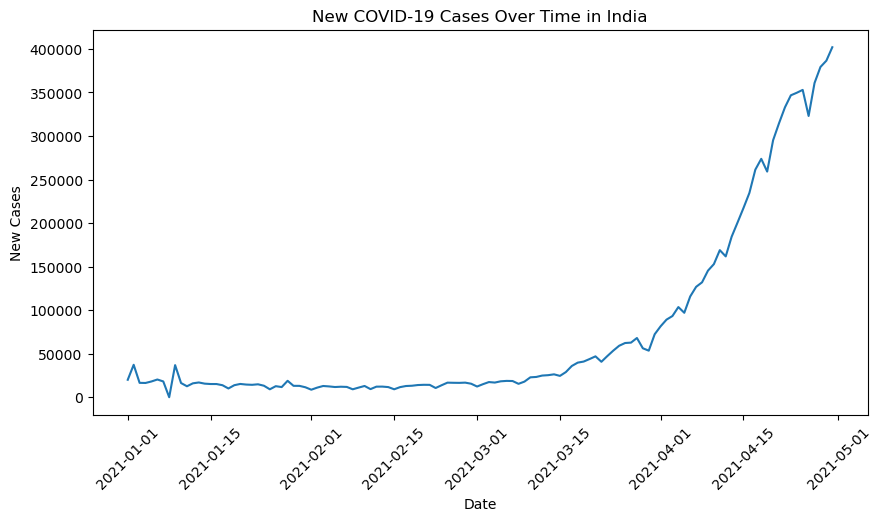

In [ ]:
df_cases_deaths['date'] = pd.to_datetime(df_cases_deaths['date'], errors='coerce')

location = 'India'
start_date = '2021-01-01'
end_date = '2021-06-30'
df_filtered = df_cases_deaths[(df_cases_deaths['location'] == location) & 
                              (df_cases_deaths['date'] >= start_date) & 
                              (df_cases_deaths['date'] <= end_date)]

if df_filtered.empty:
    print("Filtered data is empty. Check location name or date range.")
else:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='date', y='new_cases', data=df_filtered)
    plt.title(f"New COVID-19 Cases Over Time in {location}")
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.xticks(rotation=45)
    plt.show()

2. Bar Plot – Total Cases by Location

C:\Users\91628\AppData\Local\Temp\ipykernel_13548\1474666557.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_cases', y='location', data=df_top10, ci=None)


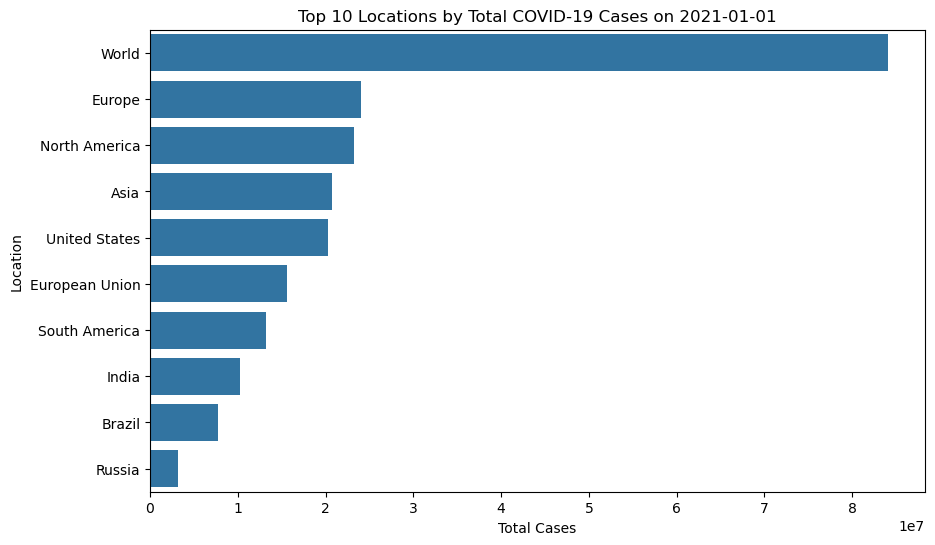

In [26]:
specific_date = '2021-01-01'
df_filtered = df_cases_deaths[df_cases_deaths['date'] == specific_date]
df_top10 = df_filtered.nlargest(10, 'total_cases')

plt.figure(figsize=(10, 6))
sns.barplot(x='total_cases', y='location', data=df_top10, ci=None)
plt.title(f"Top 10 Locations by Total COVID-19 Cases on {specific_date}")
plt.xlabel('Total Cases')
plt.ylabel('Location')
plt.show()

3. Scatter Plot – Population vs Total Cases

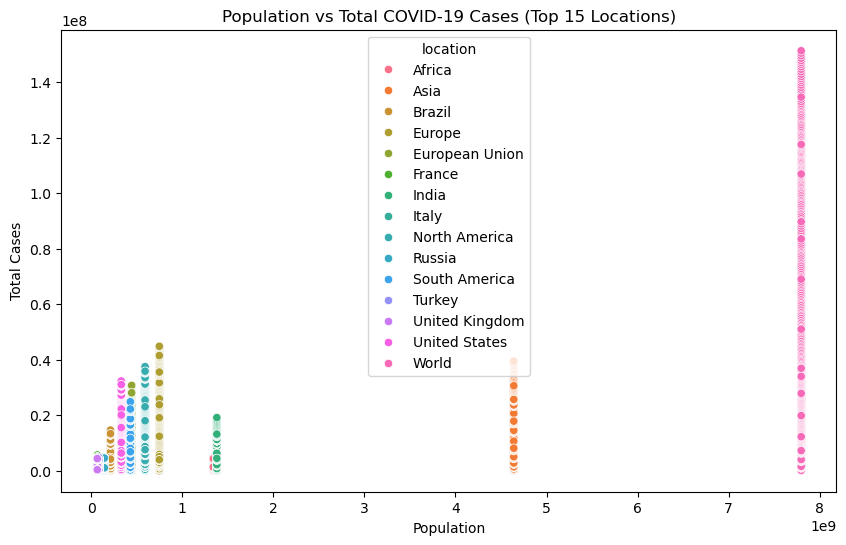

In [27]:
top_locations = df_cases_deaths.groupby('location')['total_cases'].max().nlargest(15).index
df_top15 = df_cases_deaths[df_cases_deaths['location'].isin(top_locations)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='total_cases', hue='location', data=df_top15)
plt.title("Population vs Total COVID-19 Cases (Top 15 Locations)")
plt.xlabel("Population")
plt.ylabel("Total Cases")
plt.show()

4. Line Plot– Death Rate Over Time

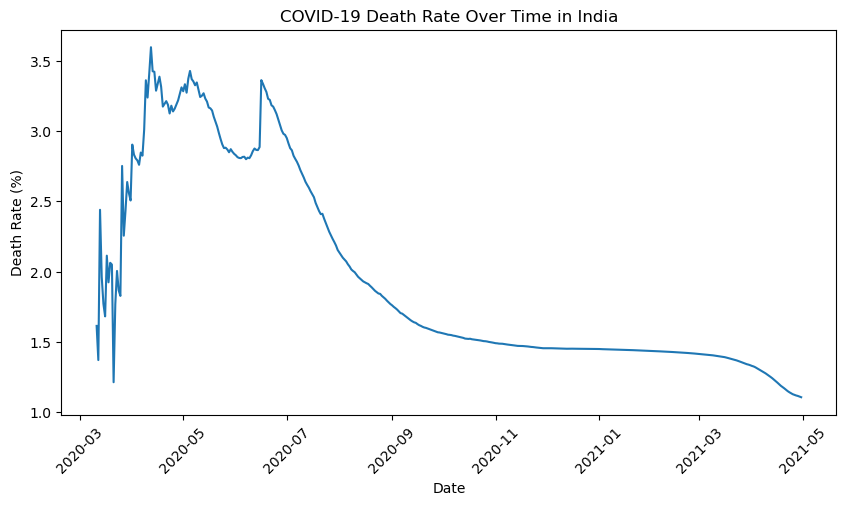

In [ ]:
df_death_rate = pd.read_sql_query("""
SELECT location, date, total_cases, total_deaths, 
       (total_deaths * 1.0 / total_cases * 100) AS death_rate
FROM Covid19
ORDER BY location, date
""", conn)

df_death_rate['date'] = pd.to_datetime(df_death_rate['date'], errors='coerce')

location = 'India'  
df_filtered = df_death_rate[(df_death_rate['location'] == location) & df_death_rate['death_rate'].notna()]

if df_filtered.empty:
    print("No data available for the specified location. Check the location name.")
else:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='date', y='death_rate', data=df_filtered)
    plt.title(f"COVID-19 Death Rate Over Time in {location}")
    plt.xlabel('Date')
    plt.ylabel('Death Rate (%)')
    plt.xticks(rotation=45)
    plt.show()
